In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [94]:
# Reads in CSV
audio_features_df = pd.read_csv('audio_features.csv')

X = audio_features_df.iloc[:,:-1]
y = audio_features_df['class']

## Correlation matrix
We can see that a bunch of the spectral features are highly correlated with each other, but that's perhaps not too surprising since we're taking the mean of the quantity over the length of the audio sample to compute these. The MFCC features don't seem to be very correlated with each other, aside from a few. We'll probably have to reduce the number of features as well when training a model.

In [97]:
corr = X.corr().round(decimals=2) 
corr.style.background_gradient(cmap='coolwarm')

,chroma_stft,spec_cent,spec_bw,rolloff,zcr,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
chroma_stft,1,-0.1,0.23,-0.04,-0.29,-0.07,0,0.19,0.41,0.28,0.55,0.26,0.13,0.1,-0.06,-0.05,-0.06,-0.21,-0.11,-0.27,-0.01,-0.09,-0.06,-0.27,-0.16
spec_cent,-0.1,1,0.9,0.99,0.96,0.39,-0.94,-0.84,0.7,-0.87,0.04,0.27,0.51,0.08,0.38,-0.46,0.18,0.19,0.47,0.43,0.65,0.27,0.45,0.07,0.6
spec_bw,0.23,0.9,1,0.93,0.77,0.47,-0.88,-0.73,0.88,-0.77,0.19,0.22,0.46,0.05,0.25,-0.54,0.08,-0,0.34,0.23,0.64,0.19,0.37,-0.14,0.41
rolloff,-0.04,0.99,0.93,1,0.92,0.45,-0.92,-0.83,0.74,-0.84,0.05,0.22,0.47,0.05,0.3,-0.51,0.12,0.11,0.42,0.35,0.63,0.23,0.4,-0.03,0.51
zcr,-0.29,0.96,0.77,0.92,1,0.33,-0.89,-0.81,0.53,-0.89,-0.05,0.27,0.46,0.06,0.46,-0.33,0.26,0.26,0.49,0.5,0.64,0.31,0.48,0.2,0.68
mfcc0,-0.07,0.39,0.47,0.45,0.33,1,-0.19,-0.6,0.43,-0.5,-0.36,-0.43,-0.16,-0.37,-0.24,-0.48,-0.17,-0.32,-0.07,-0.17,0.33,0.02,0,-0.42,-0.05
mfcc1,0,-0.94,-0.88,-0.92,-0.89,-0.19,1,0.7,-0.73,0.81,-0.22,-0.4,-0.59,-0.21,-0.47,0.37,-0.24,-0.2,-0.49,-0.5,-0.67,-0.3,-0.5,-0.19,-0.65
mfcc2,0.19,-0.84,-0.73,-0.83,-0.81,-0.6,0.7,1,-0.65,0.75,0.35,-0.01,-0.4,-0.03,-0.19,0.64,0.12,0.04,-0.21,-0.29,-0.48,-0.01,-0.18,0.04,-0.4
mfcc3,0.41,0.7,0.88,0.74,0.53,0.43,-0.73,-0.65,1,-0.51,0.24,0.18,0.43,0.09,0.11,-0.6,-0.1,-0.17,0.2,0.15,0.48,-0.01,0.23,-0.16,0.28
mfcc4,0.28,-0.87,-0.77,-0.84,-0.89,-0.5,0.81,0.75,-0.51,1,0.15,-0.05,-0.28,0.06,-0.36,0.37,-0.17,-0.11,-0.39,-0.39,-0.71,-0.33,-0.44,-0.05,-0.55


## Classifier model

In [84]:
from sklearn import decomposition

X = audio_features_df.iloc[:,:-1]
y = audio_features_df['class']

# PCA decomposition for dimensionality reduction
pca = decomposition.PCA(n_components=10,random_state=0)
pca.fit(X)
X = pca.transform(X)

# Train-test split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.1, random_state = 0)

# Label encoding for the classes
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.transform(y_test)

In [85]:
# Train a random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Make predictions
predictions_rf_train = rf.predict(X_train)
predictions_rf_test = rf.predict(X_test)

print("Train accuracy ",accuracy_score(predictions_rf_train, y_train))
print("Validation accuracy ",accuracy_score(predictions_rf_test, y_test))

Train accuracy  1.0
Validation accuracy  0.9411764705882353


In [86]:
# Cross validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = rf, X = X, y = y, cv = 10,n_jobs=-1)

print('accuracies mean',accuracies.mean())
print('accuracies std',accuracies.std())

accuracies mean 0.98125
accuracies std 0.040019526483955306


In [89]:
# Saves model to disk
import pickle

filename = 'model.pkl'
pickle.dump([rf,pca,Encoder], open(filename, 'wb'))

## PCA visualization
Here we'll use a two dimensional PCA decomposition (different from the PCA composition used when training the model) to visualize how all the different audio classes are distributed.

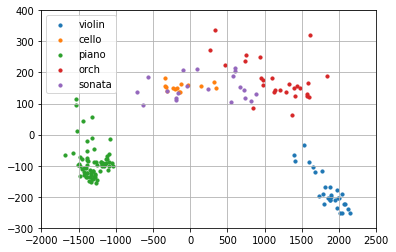

In [90]:
import matplotlib.pyplot as plt

# Visualize the results of 2D PCA
pca_2d = decomposition.PCA(n_components=2,random_state=0)
pca_2d.fit(audio_features_df.iloc[:,:-1].values)

# Array of all the unique classes
classes = audio_features_df['class'].unique()

# Plots points for every class
for x in classes:
    pca_result = pca_2d.transform(audio_features_df[audio_features_df['class']==x].iloc[:,:-1].values)      
    plt.scatter(pca_result[:,0],pca_result[:,1],s=10,label=x)

plt.legend(loc=0)
plt.xlim([-2000,2500])
plt.ylim([-300,400])
plt.grid(True)
plt.show()

In [91]:
# Saves 2D PCA model to file
filename = 'PCA_2D.pkl'
pickle.dump(pca_2d, open(filename, 'wb'))